In [26]:
import matplotlib.pyplot as plt
import pandas as pd

#Author: Willard Ford
#Version: Sep 11, 2022

In [27]:
# Part 1
"""
Method returns a dataframe given a gct file.

If summary is True, prints out the number of columns and rows. summary defaults to False.
"""
def df_gct(file, summary = False):
    # Tab separated file
    dataFrame = pd.read_csv(file, sep = "\t", skiprows = 2)
    # Optional parameter that prints the shape of our data.
    if summary:
        shape = dataFrame.shape
        print(f"Number of Rows: {shape[0]} \nNumber of Columns: {shape[1]}")
    return dataFrame


In [28]:
# Part 2
# A:
# The first call prints the number of Rows and Columns.
BRCA_minimal = df_gct("https://datasets.genepattern.org/data/test_data/BRCA_minimal_60x19.gct", True)
# B:
BRCA_large = df_gct("https://datasets.genepattern.org/data/test_data/BRCA_large_20783x40.gct")

Number of Rows: 60 
Number of Columns: 21


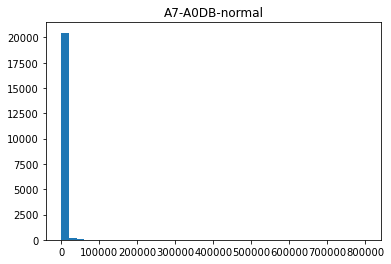

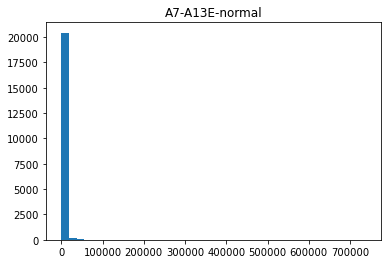

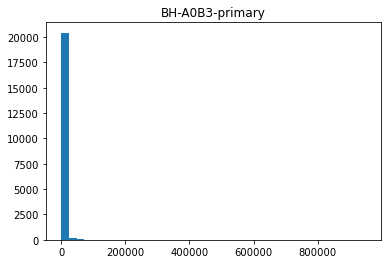

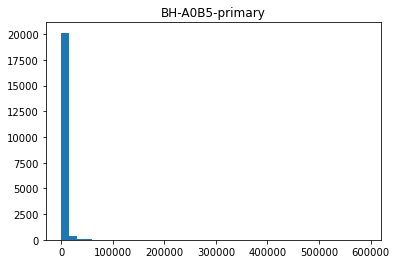

In [29]:
# Part 3

# Print all columns by creating a list of pertinent columns then iterating over them.
columns = ["A7-A0DB-normal","A7-A13E-normal","BH-A0B3-primary","BH-A0B5-primary"]

for column in columns:
    # Add title by plot
    plt.title(column)
    plt.hist(BRCA_large[column], bins = 40)
    plt.show()

In [30]:
# Part 4

data = []
# Populate data with statistics

# Cut first two non-numeric columns
columns = BRCA_large.columns[2:]
for column in columns:
    data.append((column, 
             BRCA_large[column].mean(), 
             BRCA_large[column].median(),
             BRCA_large[column].std()))
# Create and print out dataframe
df = pd.DataFrame(data, columns = ['Sample name','Mean','Median','Standard Deviation'])
print(df)

        Sample name         Mean  Median  Standard Deviation
0    A7-A0CE-normal  3308.877255   814.0        12725.531516
1    A7-A0CH-normal  3046.316942   630.0        14145.451194
2    A7-A0D9-normal  2628.131550   350.0        17827.391513
3    A7-A0DB-normal  2354.674445   362.0        13973.914409
4    A7-A13E-normal  2380.702593   427.0        13373.496798
5    A7-A13F-normal  2493.380215   527.0        12477.592390
6    A7-A13G-normal  3509.542463   454.0        30474.663592
7    AC-A23H-normal  3396.675312   659.0        20073.855034
8    AC-A2FB-normal  3675.583169   792.0        15577.976864
9    AC-A2FF-normal  3743.660492   935.0        14827.012985
10   AC-A2FM-normal  2714.893663   578.0        11431.472640
11   BH-A0AU-normal  2436.466679   641.0         8961.357233
12   BH-A0AY-normal  2412.727951   567.0         9362.391989
13   BH-A0AZ-normal  3216.765337   836.0        10744.505522
14   BH-A0B3-normal  2879.876149   772.0         9737.708560
15   BH-A0B5-normal  312

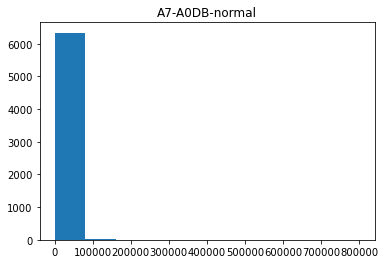

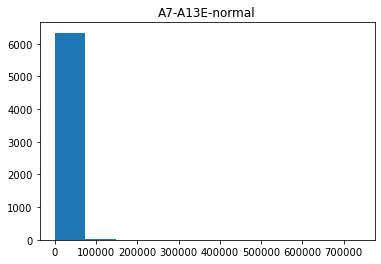

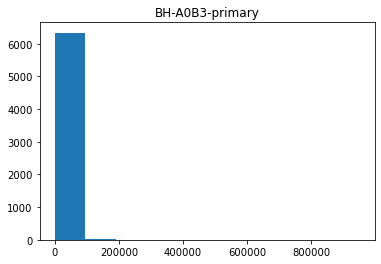

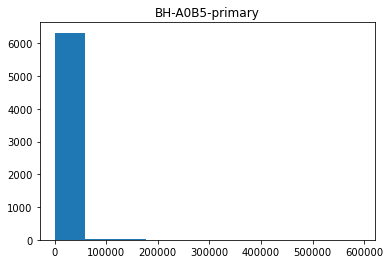

        Sample name         Mean  Median
0    A7-A0CE-normal  8611.403165  4163.0
1    A7-A0CH-normal  7922.214666  3475.5
2    A7-A0D9-normal  6984.743184  2606.5
3    A7-A0DB-normal  6353.923535  2525.5
4    A7-A13E-normal  6333.291131  2685.0
5    A7-A13F-normal  6520.713099  2939.5
6    A7-A13G-normal  9276.549358  3392.0
7    AC-A23H-normal  9157.782983  3847.0
8    AC-A2FB-normal  9651.577249  4397.0
9    AC-A2FF-normal  9924.148543  4984.5
10   AC-A2FM-normal  6992.096835  3115.0
11   BH-A0AU-normal  6362.503134  3405.5
12   BH-A0AY-normal  6229.548261  3059.0
13   BH-A0AZ-normal  8363.605923  4516.0
14   BH-A0B3-normal  7476.317299  4094.5
15   BH-A0B5-normal  8355.293952  2923.0
16   BH-A0B7-normal  6084.352554  3318.5
17   BH-A0B8-normal  7289.007364  2808.0
18   BH-A0BA-normal  5619.802570  2847.5
19   BH-A0Bc-normal  6443.944375  2952.0
20  A7-A0CE-primary  8190.635694  3912.5
21  A7-A0CH-primary  5966.786744  3095.0
22  A7-A0D9-primary  7163.784237  3464.5
23  A7-A0DB-prim

In [31]:
# Part 5
# A
# Iterate through every column is equivilant to filtering through every row, dropping values less than 500.
data_filtered = BRCA_large
for column in columns:
    data_filtered = data_filtered[data_filtered[column]>=500]
# B
# Record new means and medians in data
data = []
# Columns to print, again BH starting columns don't exist in our dataset.
q3columns = ["A7-A0DB-normal","A7-A13E-normal","BH-A0B3-primary","BH-A0B5-primary"]
for column in columns:
    # Histogram method copied from q3. Placed here so we only have to iterate once.
    if column in q3columns:
        # Histograms from q3 with new filtered data.
        plt.title(column)
        plt.hist(data_filtered[column])
        plt.show()
    data.append((column, 
             data_filtered[column].mean(), 
             data_filtered[column].median()))
# Turn data into DataFrame with column names and print
dataframe = pd.DataFrame(data, columns = ['Sample name','Mean','Median'])
print(dataframe)
